In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from os import path


plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 20, 12
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = False # True activates latex output in fonts!
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

In [10]:
CSV_FILE_PATH = path.join(path.pardir, "data", "preprocessed", "voting.csv")
df = pd.read_csv(CSV_FILE_PATH)

In [12]:
print("%d many entries" % df.size)

51048 many entries


In [13]:
df.head(10)

,Abstimmnr,Fraktion/Gruppe,Bezeichnung,vote,Fraktion,source
0,3.0,CDU/CSU,Dr. Michael von Abercron,1.0,2,data/raw_csv/20171213_3_xls-data
1,3.0,CDU/CSU,Stephan Albani,1.0,2,data/raw_csv/20171213_3_xls-data
2,3.0,CDU/CSU,Norbert Maria Altenkamp,1.0,2,data/raw_csv/20171213_3_xls-data
3,3.0,CDU/CSU,Peter Altmaier,1.0,2,data/raw_csv/20171213_3_xls-data
4,3.0,CDU/CSU,Philipp Amthor,1.0,2,data/raw_csv/20171213_3_xls-data
5,3.0,CDU/CSU,Artur Auernhammer,1.0,2,data/raw_csv/20171213_3_xls-data
6,3.0,CDU/CSU,Peter Aumer,1.0,2,data/raw_csv/20171213_3_xls-data
7,3.0,CDU/CSU,Dorothee Bär,1.0,2,data/raw_csv/20171213_3_xls-data
8,3.0,CDU/CSU,Thomas Bareiß,1.0,2,data/raw_csv/20171213_3_xls-data
9,3.0,CDU/CSU,Norbert Barthle,1.0,2,data/raw_csv/20171213_3_xls-data


In [14]:
CANONICAL_CANDIDATE_NAMES = {
    "Albrecht Heinz Erhard Glaser": "Albrecht Glaser",
    "Joana Eleonora Cotar": "Joana Cotar",
    "Johannes Vogel (L\xc3\xbcdenscheid)": "Johannes Vogel",
    "Johannes Vogel (Olpe)": "Johannes Vogel",
    "Konstantin Elias Kuhle": "Konstantin Kuhle"
}

df.replace(to_replace=CANONICAL_CANDIDATE_NAMES, inplace=True)

In [15]:
X = []
y = []
names = []

for name, data in df.groupby("Bezeichnung"):
    X.append(np.array(data["vote"].values))
    y.append(data["Fraktion"].unique()[0]) # HACK
    names.append(name)

In [16]:
X, y = X, np.array(y)

Check for candidates where we do not have all votes

In [18]:
n_max_votes = max(len(x) for x in X)
incomplete_names = [names[i] for i, x in enumerate(X) if len(x) < n_max_votes]
incomplete_names

[]

In [19]:
all(len(x) == len(X[0]) for x in X)

True

In [20]:
X = np.array(X)
X.shape

(709, 12)

## Embed data

In [23]:
from sklearn.manifold import TSNE

In [29]:
tsne = TSNE(2, n_iter=3000, random_state=1)
X_2d = tsne.fit_transform(X)

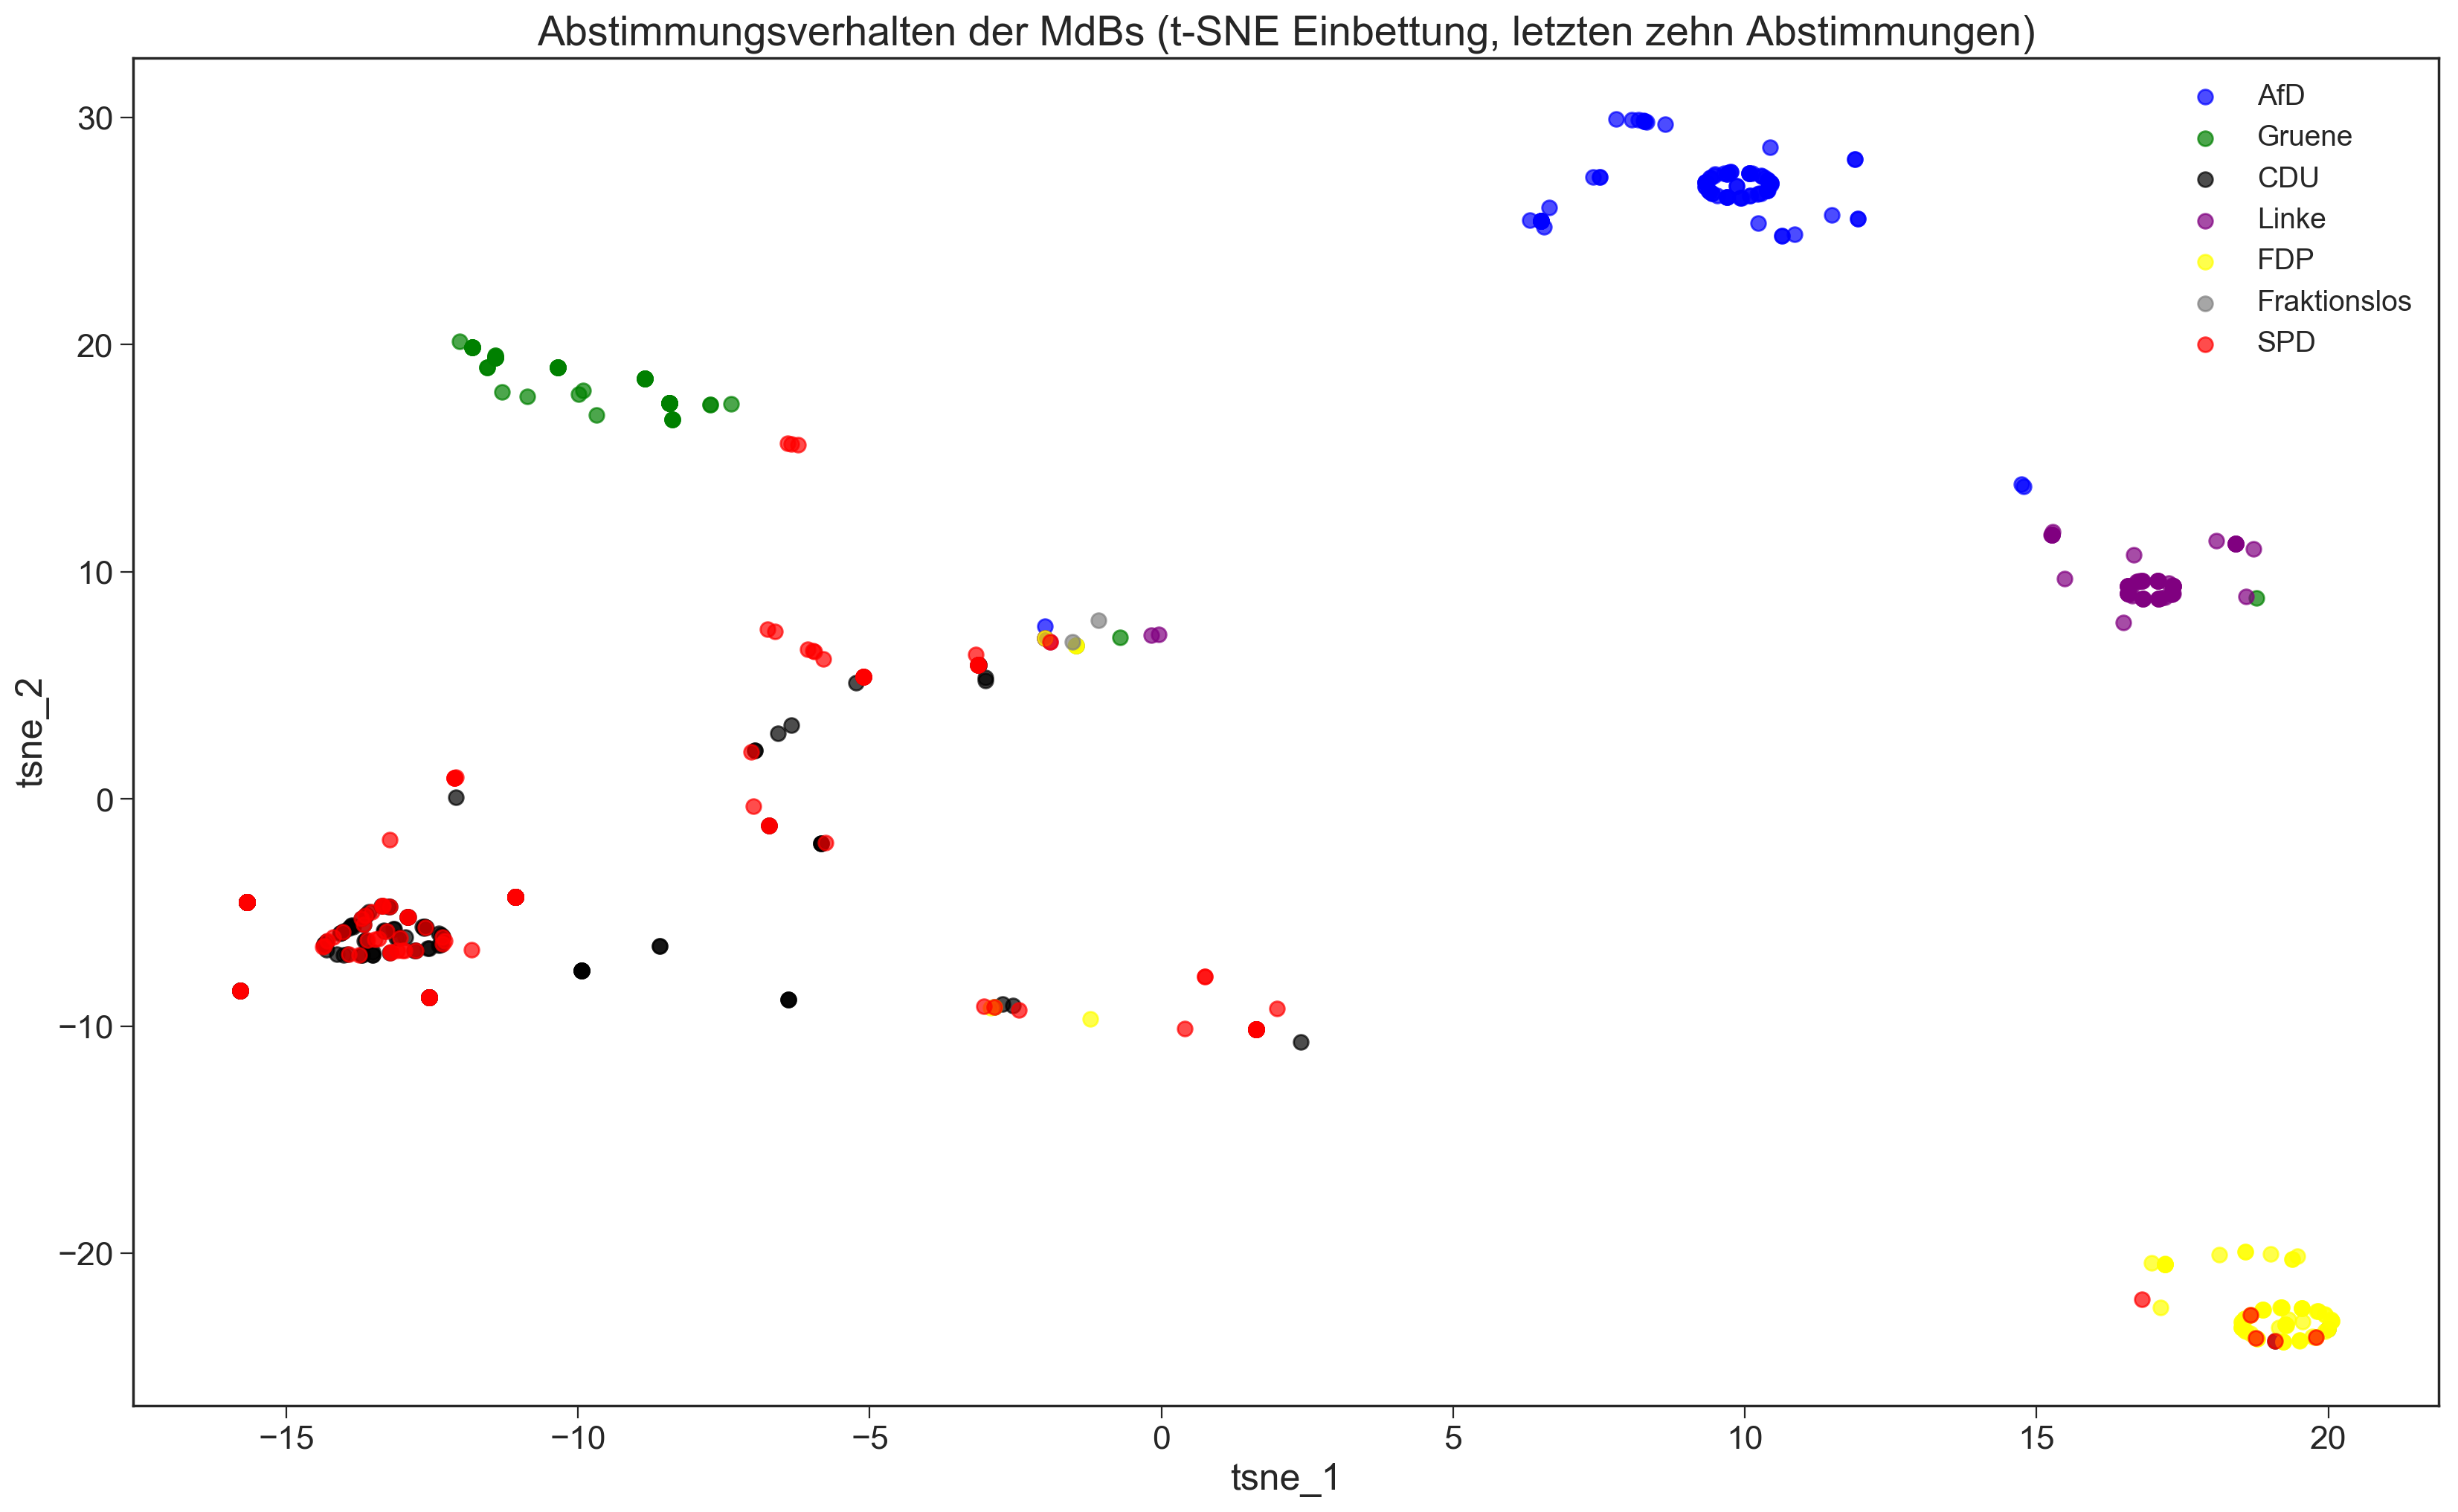

In [31]:
import seaborn as sns
sns.set_style("ticks")
# 0 == AfD
# 1 == Grüne
# 2 == CDU
# 3 == Linke
# 4 == FDP
# 5 == Fraktionslos
# 6 == SPD

legends = ["AfD", "Gruene", "CDU", "Linke", "FDP", "Fraktionslos", "SPD"]
colors = ["blue", "green", "black", "purple", "yellow", "grey", "red"]

fig, ax = plt.subplots()

for i, (label, color) in enumerate(zip(legends, colors)): 
    X_class = X_2d[y == i]
    ax.scatter(x=X_class[:, 0], y=X_class[:, 1], s=50, alpha=0.7, c=color, label=label)

plt.title("Abstimmungsverhalten der MdBs (t-SNE Einbettung, letzten zehn Abstimmungen)")
plt.xlabel("tsne_1")
plt.ylabel("tsne_2")
plt.legend()

### Verrätersuche 

In [32]:
X_afd = X_2d[y == 0]

In [39]:
mu_afd = X_afd.mean(axis=0)
outlier = max(X_afd, key=lambda v: np.linalg.norm(v - mu_afd))

In [40]:
np.where(X_2d == outlier)

(array([680, 680]), array([0, 1]))

In [41]:
names[680]

'Ulrich Oehme'